In [42]:
!pip install nltk

In [53]:
!pip install textblob

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob, Word

## Get data

In [40]:
df = pd.read_csv('dota-metacritics.csv')

In [50]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [51]:
df

,review,score
0,Great game ruined by terrible company that is ...,10
1,After almost 1 year or more since it got out o...,5
2,Re-review. I tried to get into Dota 2. I can g...,0
3,I hoped this game would get me really hooked u...,0
4,This game improved so much since it was releas...,10
...,...,...
3856,"i love this game, its just such a shame the co...",8
3857,"The game is done very well, but the community ...",7
3858,Самая лучашя игая лучашя игра в миреСамая луча...,10
3859,Отличная игра с хорошим техническим исполением...,8


In [58]:
# remove row with non-english review
df = df[df['review'].map(lambda x: x.isascii())]

In [59]:
df

,review,score
0,Great game ruined by terrible company that is ...,10
3,I hoped this game would get me really hooked u...,0
5,I don't see why people are giving this game a ...,10
6,"This game had a good start, then it slowly bec...",6
11,I hoped this game would get me really hooked u...,2
...,...,...
3846,good good good good good good good good good g...,8
3852,"3 thousand hours, an incredible number of situ...",7
3854,this is tottaly s h i t h o u s e. Spend a l...,5
3855,While featuring a higher entry-level in compar...,7


## Process data

In [60]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thor\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Thor\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [61]:
stop_words = stopwords.words('english')

In [65]:
#lemmatization adalah merubah kata ke kata dasar

def processed_review(review):
    processed = review
    processed.replace('[^\w\s]', '')
    processed = ' '.join(word for word in processed.split() if word not in stop_words)
    processed = ' '.join(Word(word).lemmatize() for word in processed.split())
    return (processed)

In [66]:
df['processed'] = df['review'].apply(lambda x: processed_review(x))

In [68]:
df.head()

,review,score,processed
0,Great game ruined by terrible company that is ...,10,Great game ruined terrible company involved en...
3,I hoped this game would get me really hooked u...,0,I hoped game would get really hooked long long...
5,I don't see why people are giving this game a ...,10,I see people giving game low rating community....
6,"This game had a good start, then it slowly bec...",6,"This game good start, slowly became something ..."
11,I hoped this game would get me really hooked u...,2,I hoped game would get really hooked long long...


## Calculate Sentiment

In [69]:
df['polarity'] = df['processed'].apply(lambda x : TextBlob(x).sentiment[0])
df['subjectivity'] = df['processed'].apply(lambda x : TextBlob(x).sentiment[1])

In [70]:
df.head()

,review,score,processed,polarity,subjectivity
0,Great game ruined by terrible company that is ...,10,Great game ruined terrible company involved en...,-0.150000,0.662500
3,I hoped this game would get me really hooked u...,0,I hoped game would get really hooked long long...,-0.156250,0.416667
5,I don't see why people are giving this game a ...,10,I see people giving game low rating community....,0.075000,0.506250
6,"This game had a good start, then it slowly bec...",6,"This game good start, slowly became something ...",-0.166667,0.533333
11,I hoped this game would get me really hooked u...,2,I hoped game would get really hooked long long...,-0.156250,0.416667


In [98]:
df['Ma Polarity'] = df.polarity.rolling(10, min_periods=3).mean()
df['Ma Subjectivity'] = df.subjectivity.rolling(10, min_periods=3).mean()

In [114]:
ma_polarity = np.array(df['Ma Polarity'])[::15]
ma_subjectivity = np.array(df['Ma Subjectivity'])[::15]

In [115]:
time = np.array(df.index)[::10]

Text(0.5, 1.0, 'Moving Average Subjectivity on Dota 2 Reviews in Metacritics')

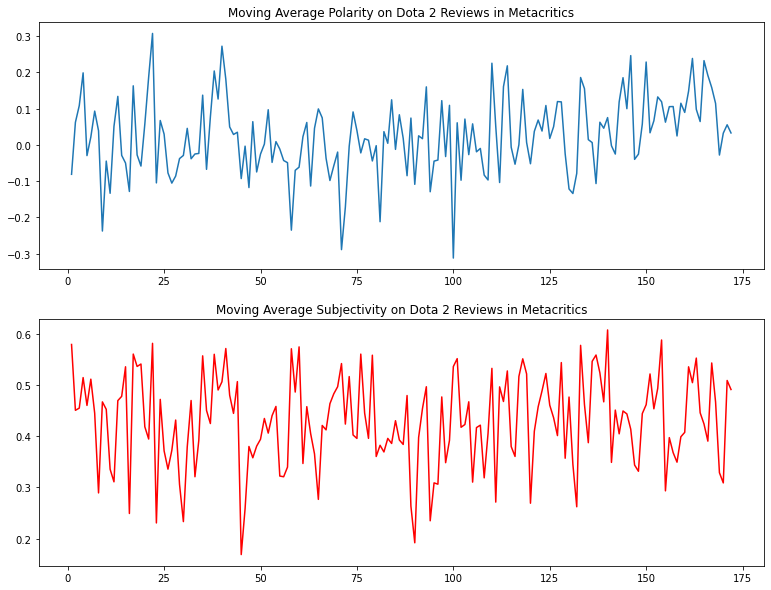

In [116]:
fig, ax = plt.subplots(2,1, figsize=(13,10))
ax[0].plot(ma_polarity)
ax[0].set_title("Moving Average Polarity on Dota 2 Reviews in Metacritics")
ax[1].plot(ma_subjectivity, color='red')
ax[1].set_title("Moving Average Subjectivity on Dota 2 Reviews in Metacritics")